<a href="https://colab.research.google.com/github/aayushrijal2017/Vision-Assignment-02/blob/main/Vision_Assignment_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Download the test image moonlanding.png from D2L located in the Assignment 02 folder and save it in your working directory.**
1. (5 marks) Convert to the frequency domain and center the spectrum. Calculate
the maximum value of the frequency spectrum (use MATLAB command F Smax =
max(F S(:)), where F S is the frequency spectrum and F Smax is its maximum value)

In [2]:
# Importing the required liabraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the image,convert to grayscale.
image = cv2.imread('moonlanding.png', cv2.IMREAD_GRAYSCALE)

# Convert the image to floating-point precision for further processing
image = image.astype(np.float32) / 255.0

# Compute the 2D Fourier Transform of the image and Shift the zero frequency component to the center of the spectrum
ft = np.fft.fft2(image)
ft_shifted = np.fft.fftshift(ft)

# Calculate the magnitude spectrum and finding the maximum value
magnitude_spectrum = np.abs(ft_shifted)
FS_max = np.max(magnitude_spectrum)

print("Maximum value of the frequency spectrum:", FS_max)

Maximum value of the frequency spectrum: 91097.66873821663


**2. (5 marks) Display the frequency spectrum obtained in Question 1 as an image.**

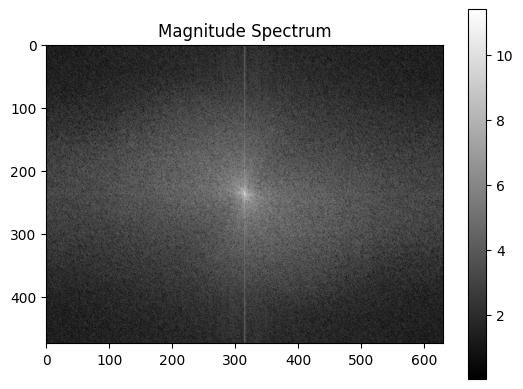

In [3]:
# Display the magnitude spectrum
plt.imshow(np.log1p(magnitude_spectrum), cmap='gray')
plt.colorbar()
plt.title('Magnitude Spectrum')
plt.show()

**3. (25 marks) Using the centered frequency spectrum obtained in Question 1, manually introduce noise at eight points. The points must be located on the circle at a distance of 100 from the center point of the image and having 45◦ angle increments at the four cardinal and intercardinal directions (N,S,E,W,NE,NW,SE,SW). Find the 3 × 3 neighborhoods of these eight elements and set their values to F Smax/10 where F Smax was obtained in Question 1. Display the resultant spectrum as an image**

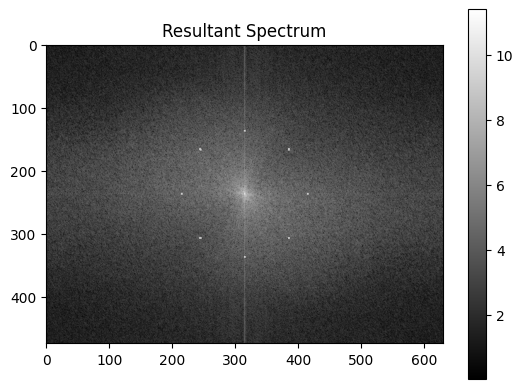

In [10]:
# Find the center point of the spectrum
center_x, center_y = magnitude_spectrum.shape[0] // 2, magnitude_spectrum.shape[1] // 2

# Calculate the distance of points from the center
radius = 100

# Calculate the coordinates of the eight points on the circle
points = [(center_x - radius, center_y),
          (center_x + radius, center_y),
          (center_x, center_y + radius),
          (center_x, center_y - radius),
          (int(center_x - radius / np.sqrt(2)), int(center_y + radius / np.sqrt(2))),
          (int(center_x - radius / np.sqrt(2)), int(center_y - radius / np.sqrt(2))),
          (int(center_x + radius / np.sqrt(2)), int(center_y + radius / np.sqrt(2))),
          (int(center_x + radius / np.sqrt(2)), int(center_y - radius / np.sqrt(2)))]

# Set the values of the 3x3 neighborhoods of the eight points to FS_max/10
FS_max = np.max(magnitude_spectrum)
neighborhood_size = 1  # Half of the neighborhood size

for point in points:
    x, y = point
    magnitude_spectrum[x - neighborhood_size: x + neighborhood_size + 1,
                       y - neighborhood_size: y + neighborhood_size + 1] = FS_max / 10

# Display the resultant spectrum as an image
plt.imshow(np.log1p(magnitude_spectrum), cmap='gray')
plt.colorbar()
plt.title('Resultant Spectrum')
plt.show()


**4. (5 marks) Convert the frequency domain representation in Question 3 to the spatial
domain, scale it and display the result. Observe the result of adding noise, and comment
briefly on the noisy image.**

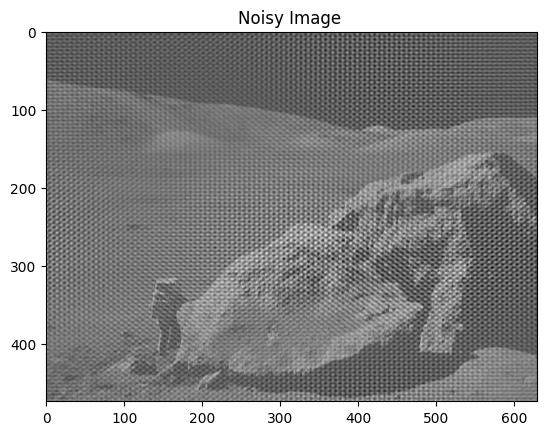

In [11]:
# Convert the magnitude spectrum back to the frequency domain
ft_shifted_modified = magnitude_spectrum * np.exp(1j * np.angle(ft_shifted))
ft_modified = np.fft.ifftshift(ft_shifted_modified)
image_restored = np.fft.ifft2(ft_modified).real

# Scale the spatial domain image
image_restored_scaled = (image_restored - np.min(image_restored)) / (np.max(image_restored) - np.min(image_restored))

# Display the restored image
plt.imshow(image_restored_scaled, cmap='gray')
plt.title('Noisy Image ')
plt.show()


**5. (5 marks) Now, using the image from Question 4 (which is corrupted with periodic
noise), obtain the frequency domain representation, center the spectrum and display
it. Comment on whether or not it looks like the frequency spectrum you manually
created in Question 3**

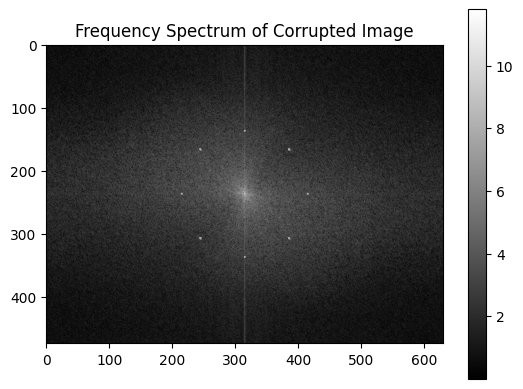

In [13]:
# Load the corrupted image with manually added noise
corrupted_image = image_restored_scaled

# Compute the 2D Fourier Transform of the corrupted image
ft_corrupted = np.fft.fft2(corrupted_image)

# Shift the zero frequency component to the center of the spectrum
ft_shifted_corrupted = np.fft.fftshift(ft_corrupted)

# Calculate the magnitude spectrum
magnitude_spectrum_corrupted = np.abs(ft_shifted_corrupted)

# Display the frequency spectrum
plt.imshow(np.log1p(magnitude_spectrum_corrupted), cmap='gray')
plt.colorbar()
plt.title('Frequency Spectrum of Corrupted Image')
plt.show()


**6. (30 marks) Assuming the cutoff frequency D0=100 and the width W = 8, design:
(a) Ideal
(b) Butterworth with order 4 (i.e. n=4)
(c) Gaussian
band-reject filters to remove the periodic noise you introduced in the frequency domain.
The filters should be of the same size as the original image. Display the three designed
filters as three separate grayscale images.**

<ipython-input-14-27e81fea1f17>:25: RuntimeWarning: divide by zero encountered in true_divide
  H_butterworth = 1 - 1 / (1 + ((D**2 - D0**2) / (D * W))**(2 * n))
<ipython-input-14-27e81fea1f17>:28: RuntimeWarning: divide by zero encountered in true_divide
  H_gaussian = 1 - np.exp(-((D**2 - D0**2) / (D * W))**2)


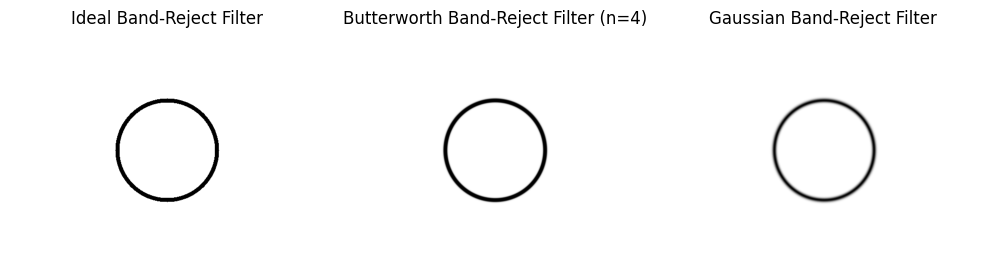

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
D0 = 100
W = 8
n = 4

# Get the image size from the corrupted image
image_size = corrupted_image.shape

# Create a grid of coordinates
x = np.arange(-image_size[1] // 2, image_size[1] // 2)
y = np.arange(-image_size[0] // 2, image_size[0] // 2)
X, Y = np.meshgrid(x, y)

# Calculate the distances from the center
D = np.sqrt(X**2 + Y**2)

# Ideal band-reject filter
H_ideal = np.ones(image_size)
H_ideal[(D >= D0 - W / 2) & (D <= D0 + W / 2)] = 0

# Butterworth band-reject filter
H_butterworth = 1 - 1 / (1 + ((D**2 - D0**2) / (D * W))**(2 * n))

# Gaussian band-reject filter
H_gaussian = 1 - np.exp(-((D**2 - D0**2) / (D * W))**2)

plt.figure(figsize=(10, 4))
# Display the filters
plt.subplot(131)
plt.imshow(H_ideal, cmap='gray')
plt.title('Ideal Band-Reject Filter')
plt.axis('off')

plt.subplot(132)
plt.imshow(H_butterworth, cmap='gray')
plt.title('Butterworth Band-Reject Filter (n=4)')
plt.axis('off')

plt.subplot(133)
plt.imshow(H_gaussian, cmap='gray')
plt.title('Gaussian Band-Reject Filter')
plt.axis('off')

plt.tight_layout()
plt.show()


**7. (10 marks) Implement the band reject filters you developed in Question 6 to remove
the noise you also introduced using element-wise multiplication. Display the results in
the frequency domain for each filter individually.**

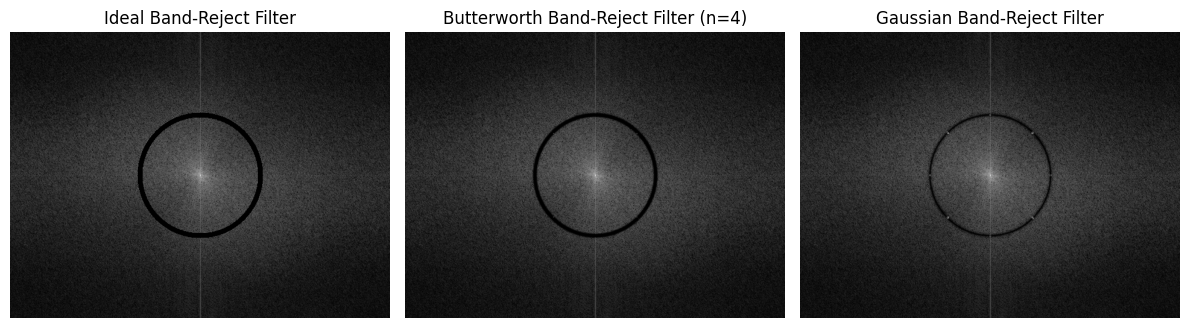

In [15]:
# Apply the filters in the frequency domain
filtered_spectrum_ideal = ft_shifted_corrupted * H_ideal
filtered_spectrum_butterworth = ft_shifted_corrupted * H_butterworth
filtered_spectrum_gaussian = ft_shifted_corrupted * H_gaussian

# Display the filtered spectra
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(np.log1p(np.abs(filtered_spectrum_ideal)), cmap='gray')
plt.title('Ideal Band-Reject Filter')
plt.axis('off')

plt.subplot(132)
plt.imshow(np.log1p(np.abs(filtered_spectrum_butterworth)), cmap='gray')
plt.title('Butterworth Band-Reject Filter (n=4)')
plt.axis('off')

plt.subplot(133)
plt.imshow(np.log1p(np.abs(filtered_spectrum_gaussian)), cmap='gray')
plt.title('Gaussian Band-Reject Filter')
plt.axis('off')

plt.tight_layout()
plt.show()


**8. (10 marks) Convert the three frequency domain representations of the filtered image
found in Question 7 to the spatial domain, scale them and display the results. Compare
the resultant images:
(a) with the noisy image in Question 4.
(b) with the original image, moonlanding.png.**

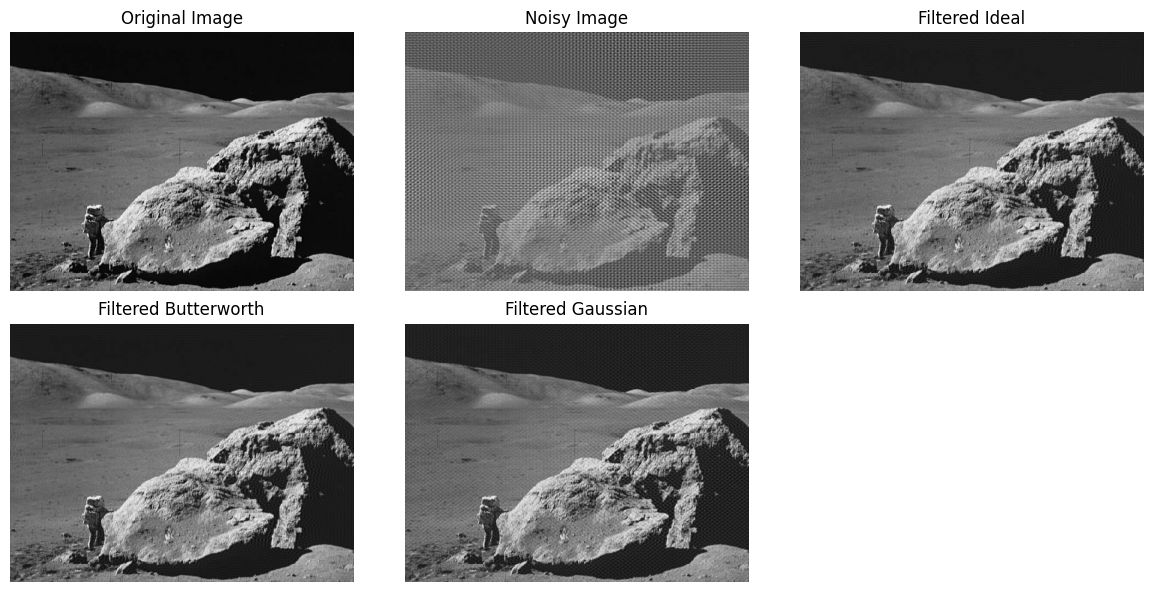

In [22]:
# Convert the filtered spectra back to the spatial domain
ft_restored_ideal = np.fft.ifftshift(filtered_spectrum_ideal)
image_restored_ideal = np.fft.ifft2(ft_restored_ideal).real

ft_restored_butterworth = np.fft.ifftshift(filtered_spectrum_butterworth)
image_restored_butterworth = np.fft.ifft2(ft_restored_butterworth).real

ft_restored_gaussian = np.fft.ifftshift(filtered_spectrum_gaussian)
image_restored_gaussian = np.fft.ifft2(ft_restored_gaussian).real

# Scale the spatial domain images
image_restored_ideal_scaled = (image_restored_ideal - np.min(image_restored_ideal)) / (np.max(image_restored_ideal) - np.min(image_restored_ideal))
image_restored_butterworth_scaled = (image_restored_butterworth - np.min(image_restored_butterworth)) / (np.max(image_restored_butterworth) - np.min(image_restored_butterworth))
image_restored_gaussian_scaled = (image_restored_gaussian - np.min(image_restored_gaussian)) / (np.max(image_restored_gaussian) - np.min(image_restored_gaussian))

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(231)
plt.imshow(cv2.imread('moonlanding.png', cv2.IMREAD_GRAYSCALE), cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(232)
plt.imshow(corrupted_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(233)
plt.imshow(image_restored_ideal_scaled, cmap='gray')
plt.title('Filtered Ideal')
plt.axis('off')

plt.subplot(234)
plt.imshow(image_restored_butterworth_scaled, cmap='gray')
plt.title('Filtered Butterworth')
plt.axis('off')

plt.subplot(235)
plt.imshow(image_restored_gaussian_scaled, cmap='gray')
plt.title('Filtered Gaussian')
plt.axis('off')

plt.tight_layout()
plt.show()

**9. (5 marks) Comment on the differences in the performance of the three band-reject filters used, with respect to their ability to recover the original image.**

The performance of the three band-reject filters, namely the Ideal, Butterworth, and Gaussian filters, can vary in terms of their ability to recover the original image. Here are some general comments on the differences in their performance:

Ideal Band-Reject Filter: The Ideal filter completely eliminates the specified frequency band, resulting in a sharp transition between the rejected and passed frequencies. As a result, the filtered image may exhibit ringing artifacts around the edges of the rejected region, known as the Gibbs phenomenon. While the Ideal filter can effectively remove noise within the specified band, it may also introduce some distortion around the rejected frequencies.

Butterworth Band-Reject Filter: The Butterworth filter provides a smoother transition between the rejected and passed frequencies compared to the Ideal filter. The filter's order (determined by the parameter n) influences the shape of the transition region. A higher order results in a steeper transition. The Butterworth filter can reduce noise within the specified band while generally producing fewer artifacts compared to the Ideal filter.

Gaussian Band-Reject Filter: The Gaussian filter offers a smooth and gradual transition between the rejected and passed frequencies. It uses a Gaussian-shaped curve to reject frequencies within the specified band. The filter's performance lies between that of the Ideal and Butterworth filters. It can effectively suppress noise within the band while typically exhibiting fewer artifacts compared to the Ideal filter. The Gaussian filter tends to provide a more visually pleasing result due to the smoothness of the transition.

The choice of which filter to use depends on the specific requirements of the image and the desired trade-off between noise removal and introduced artifacts. Generally, the Ideal filter can provide stronger noise reduction, but it may introduce more visible artifacts. The Butterworth and Gaussian filters offer smoother transitions and are better suited for cases where a balance between noise reduction and preserving image quality is desired.